# Achraf Safsafi
# DSC 550
# Project
 

In [1]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df = df.set_index('CustomerID')
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [2]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Checking for missing values

In [3]:
##Checking for missing values 
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
# Get column names
col_names = df.columns
col_names

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [6]:
# encoding gender
df['Gender']= df['Gender'].map({'Male':1,'Female':0})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [7]:
# Converting object to Int 
df['Gender'] = pd.to_numeric(df['Gender'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 7.8 KB


## feature scaling

In [9]:
#scaled_features_df
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
s_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
s_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1.128152,-1.424569,-1.738999,-0.434801
2,1.128152,-1.281035,-1.738999,1.195704
3,-0.886405,-1.352802,-1.700830,-1.715913
4,-0.886405,-1.137502,-1.700830,1.040418
5,-0.886405,-0.563369,-1.662660,-0.395980


## Exploring the Data

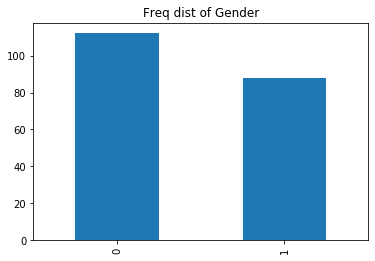

In [10]:
# bar plot for Gender column
df['Gender'].value_counts().plot.bar(title='Freq dist of Gender')

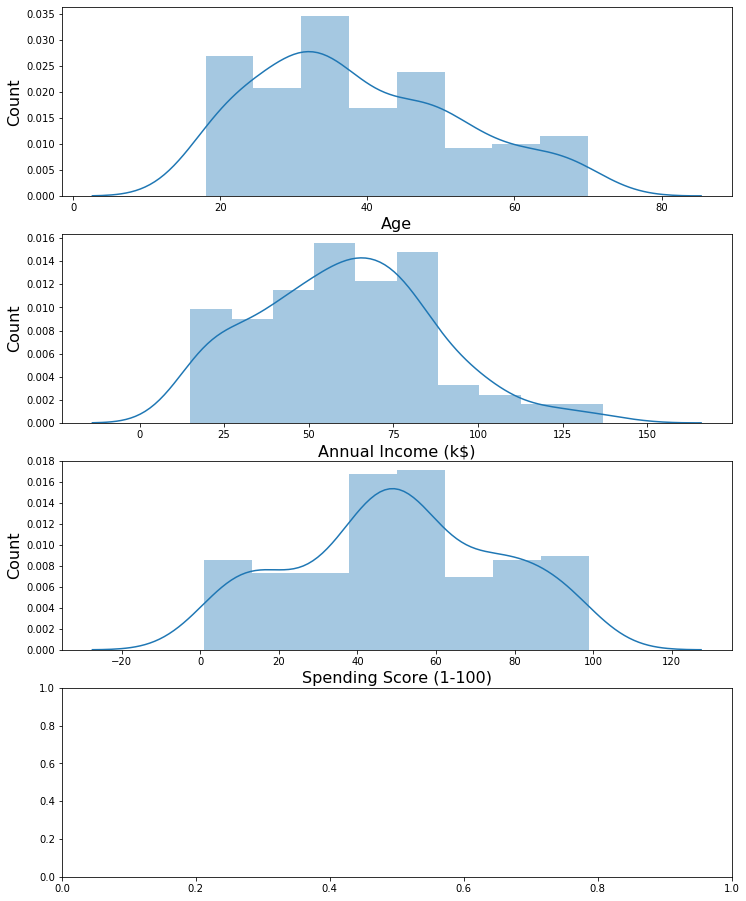

In [11]:
#plot the univariate distribution of the numerical columns
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(len(col_names), figsize=(12,16))
col_names = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    #ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=16)
    ax[i].set_ylabel('Count', fontsize=16)

plt.show()

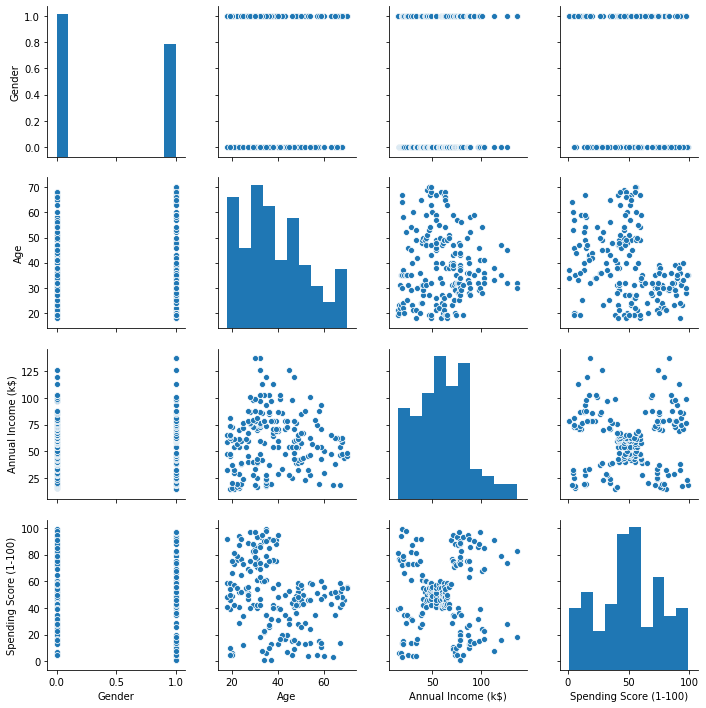

In [12]:
# get bivariate distribution plots 
sns.pairplot(df)

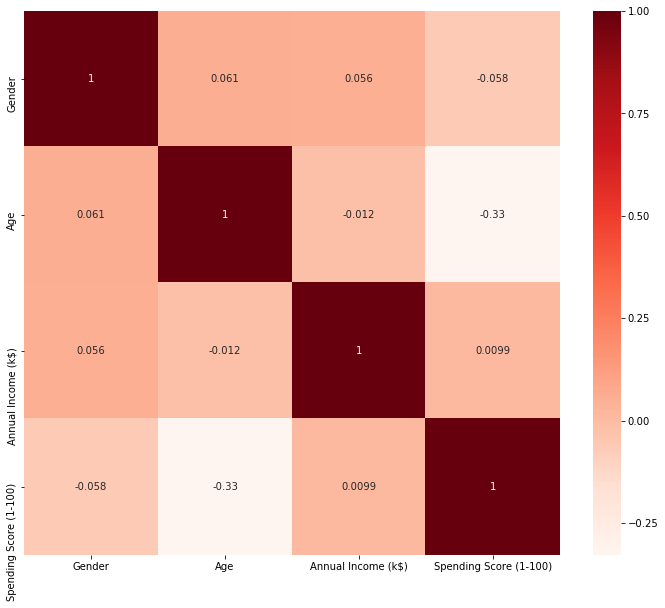

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Clustering Analysis

In [14]:
#Select the annual income and the spending score columns
data = pd.DataFrame(s_df, columns = ['Annual Income (k$)','Spending Score (1-100)'])
data


,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980
...,...,...
196,2.268791,1.118061
197,2.497807,-0.861839
198,2.497807,0.923953


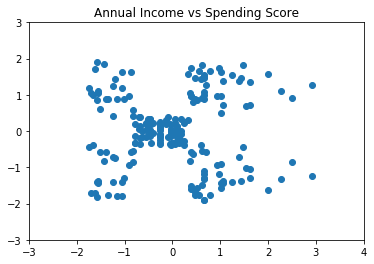

In [15]:
#Visualizing the data 
plt.plot() 
plt.xlim([-3, 4]) 
plt.ylim([-3, 3]) 
plt.title('Annual Income vs Spending Score') 
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)']) 
plt.show()

## Kmeans Algorithm

## The Elbow Method to Find The Optimal k

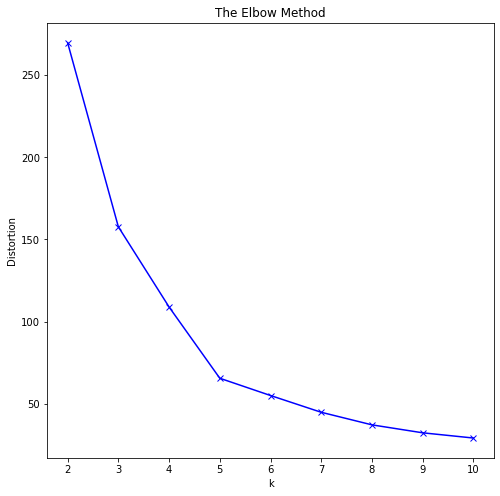

In [16]:
import numpy as np
from sklearn.cluster import KMeans
#Running K-Means with a range of k
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
#Plotting the distortions of K-Means
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

## Using Silhouette Analysis for Selecting k

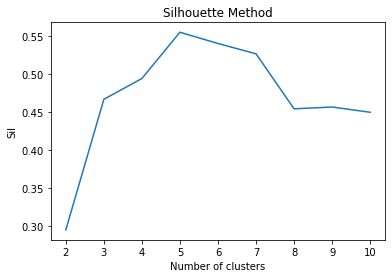

2:0.29512063001659344
3:0.46658474419000145
4:0.4939069237513199
5:0.5546571631111091
6:0.5398800926790663
7:0.5263454490712252
8:0.4541279523637649
9:0.4564615682225599
10:0.44958425368741173


In [17]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(data)  
  preds = kmeans.fit_predict(data)
  sil.append(silhouette_score(data, preds, metric = 'euclidean'))


plt.plot(range(2, 11), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

## Applying k-means algorithm 

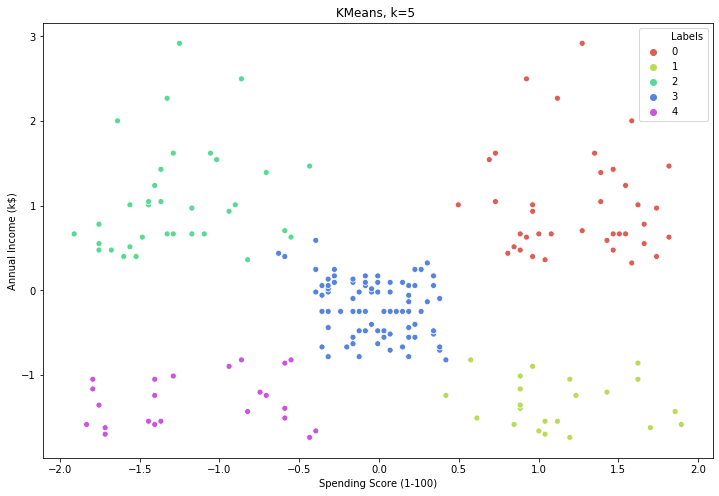

In [18]:
# Perform clustering using kmeans
#X = df.drop(['Gender','Age'], axis=1)
km = KMeans(n_clusters=5).fit(data)

data['Labels'] = km.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(s_df['Spending Score (1-100)'], s_df['Annual Income (k$)'], hue=data['Labels'],
                           palette=sns.color_palette('hls', 5))
plt.title('KMeans, k=5 ')
plt.show()

## GMM Clustering

## Finding the Optimal Numbers of Clusters using BIC/AIC Plot


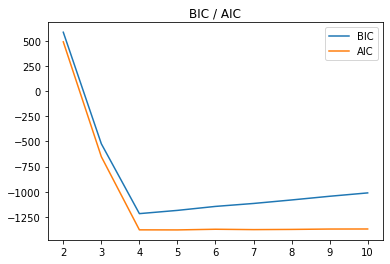

In [19]:
from sklearn.mixture import GaussianMixture
bic = []
aic = []
for i in range(2,11):
    gm = GaussianMixture( n_components = i+1, n_init = 10,
                     max_iter = 100)
    gm.fit(data)
    bic.append(gm.bic(data))
    aic.append(gm.aic(data))

fig = plt.figure()
plt.plot(range(2,11), bic,label = 'BIC')
plt.plot(range(2,11), aic ,label ='AIC')
plt.legend(loc="upper right")
plt.title('BIC / AIC')
plt.show()

## Performing Gaussian Mixture Model 

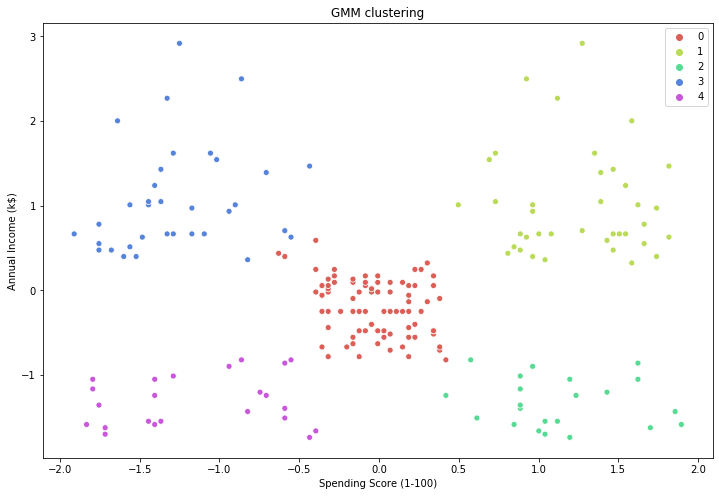

In [20]:
# performing gaussian mixture model 
gmm = GaussianMixture(n_components=5).fit(data)

#predictions from gmm
labels = gmm.predict(data)
plt.figure(figsize=(12, 8))
sns.scatterplot(data['Spending Score (1-100)'], data['Annual Income (k$)'], hue=labels,
                           palette=sns.color_palette('hls', 5))
plt.title('GMM clustering')
plt.show()

## hierarchical clustering

## Finding the Optimal Numbers of Clusters

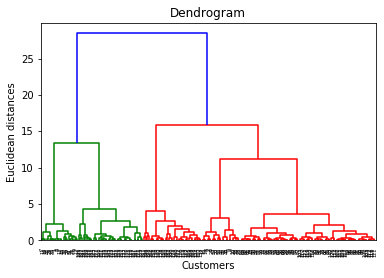

In [21]:
# Using the dendrogram to find the optimal numbers of clusters. 

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Applying Hierarchical Clustering Algorithm

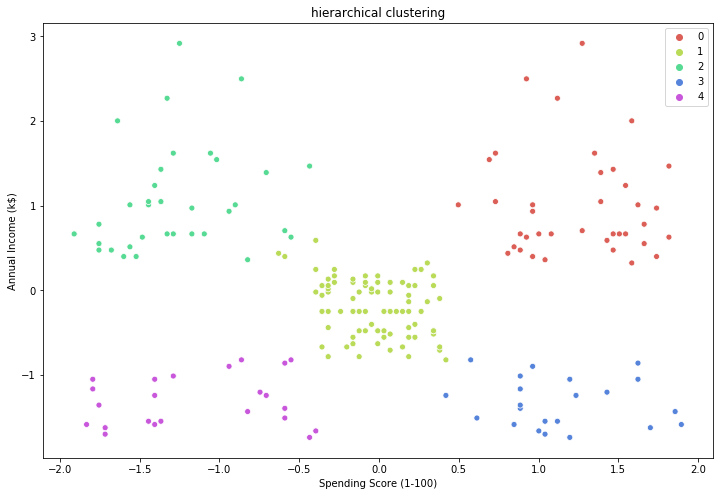

In [22]:

from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward').fit(data)
#data['Labels'] = km.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data['Spending Score (1-100)'], data['Annual Income (k$)'], hue=hc.labels_,
                           palette=sns.color_palette('hls', 5))
plt.title('hierarchical clustering')
plt.show()